<a href="https://colab.research.google.com/github/FrenchFreis/CCDEPLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [166]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [167]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [168]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [169]:
def map_rating_to_sentiment(rating_list):

  return [1 if int(r) > 3 else 0 for r in rating_list]

dataset['sentiment'] = map_rating_to_sentiment(dataset['rating'].tolist())

# Extract sentences and labels
review = dataset['review'].tolist()
rating = dataset['sentiment'].tolist()

# Split into training and testing sets
training_size = int(len(review) * 0.8)

training_sentences = review[0:training_size]
testing_sentences = review[training_size:]
training_labels = rating[0:training_size]
testing_labels = rating[training_size:]


# Convert labels to numpy arrays
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



In [170]:
vocab_size = 2500
embedding_dim = 16
max_length = 22
trunc_type='post'
padding_type='post'
oov_tok = ""

## 1. Tokenize the data

In [171]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [172]:
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'the': 2, 'na': 3, 'i': 4, 'ko': 5, 'sa': 6, 'yung': 7, 'and': 8, 'ang': 9, 'ng': 10, 'it': 11, 'lang': 12, 'is': 13, 'at': 14, 'you': 15, 'seller': 16, 'naman': 17, 'to': 18, 'for': 19, 'not': 20, 'po': 21, 'sya': 22, 'maganda': 23, 'order': 24, 'pa': 25, 'but': 26, 'thank': 27, 'pero': 28, 'a': 29, 'good': 30, 'item': 31, 'product': 32, 'hindi': 33, 'so': 34, 'sana': 35, 'my': 36, 'ung': 37, 'dumating': 38, 'this': 39, 'ok': 40, 'delivery': 41, 'di': 42, 'was': 43, 'din': 44, 'its': 45, 'may': 46, 'quality': 47, 'in': 48, 'color': 49, 'price': 50, 'working': 51, 'very': 52, 'of': 53, 'ako': 54, 'ganda': 55, 'that': 56, 'me': 57, 'lng': 58, 'well': 59, 'buy': 60, 'with': 61, 'size': 62, 'mga': 63, 'fast': 64, 'as': 65, 'nice': 66, 'nyo': 67, 'will': 68, 'time': 69, 'nya': 70, 'siya': 71, '1': 72, 'black': 73, 'just': 74, 'items': 75, 'lazada': 76, 'thanks': 77, 'kasi': 78, 'are': 79, 'okay': 80, 'much': 81, 'kaso': 82, 'nmn': 83, 'on': 84, 'kaya': 85, '2': 86, 'kung': 87, 'ord

## 2. Sequence the data

In [173]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

print (training_sequences)

[[749, 80, 1514, 390, 66], [42, 1515, 517, 63, 62, 219, 46, 89, 603, 1516], [94, 126, 11, 9, 55, 1517, 1518, 24, 3, 100, 42, 100, 1519, 1520, 55, 24, 167, 54, 14, 9, 168, 38], [55, 21, 104], [119, 1521, 23, 604, 22], [9, 1522, 345, 518, 1523, 345, 1524, 5, 104, 44, 6, 41, 605, 9, 1007, 180, 27, 15, 21, 220], [23, 22, 153, 127, 120, 12], [], [], [127, 445, 14, 750, 1008, 1525, 10, 1526, 42, 23, 9, 519, 42, 751, 1009, 91, 391, 91, 317, 1527, 520, 10, 1528], [606, 1529], [1530, 607, 47, 1531, 1532], [27, 15, 9, 55, 1533, 167, 54, 10, 1534, 35, 36, 272, 3, 114, 101, 521, 1010], [30, 47, 14, 119, 17, 9, 1535, 27, 15, 16], [55, 1536, 12, 392, 167, 446, 5, 1537, 33, 107, 28, 9, 55, 522, 752], [1538, 1539, 1540], [9, 55, 1541, 1542, 25, 6, 1011, 114, 25, 1543, 9, 1011, 77, 16, 14, 6, 1544, 169, 115, 24, 167, 523], [40, 17, 7, 1545, 608, 753, 3, 447, 253, 108, 12, 8, 127, 107, 22, 42, 393, 136, 6, 181, 195, 154, 524, 28, 40, 3, 22, 19, 2, 50, 108, 12, 17, 182, 609, 5, 12, 22, 10, 1546, 1547, 3]

## 3. Pad the data

In [174]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## 4. Train a sentiment model

In [175]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 22, 16)         │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_9      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,109 (156.68 KB)

 Trainable params: 40,109 (156.68 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 22, 16)         │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_10     │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,109 (156.68 KB)

 Trainable params: 40,109 (156.68 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5403 - loss: 0.6915 - val_accuracy: 0.2139 - val_loss: 0.7097
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5746 - loss: 0.6864 - val_accuracy: 0.2139 - val_loss: 0.7185
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5717 - loss: 0.6802 - val_accuracy: 0.2139 - val_loss: 0.7254
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6104 - loss: 0.6677 - val_accuracy: 0.2786 - val_loss: 0.7135
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7018 - loss: 0.6550 - val_accuracy: 0.3333 - val_loss: 0.7093
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7273 - loss: 0.6313 - val_accuracy: 0.4129 - val_loss: 0.6960
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7642 - loss: 0.6145 - val_accuracy: 0.5124 - val_loss: 0.6765
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8018 - loss: 0.5775 - val_accuracy: 0.5075 - va

## Get files for visualing the network

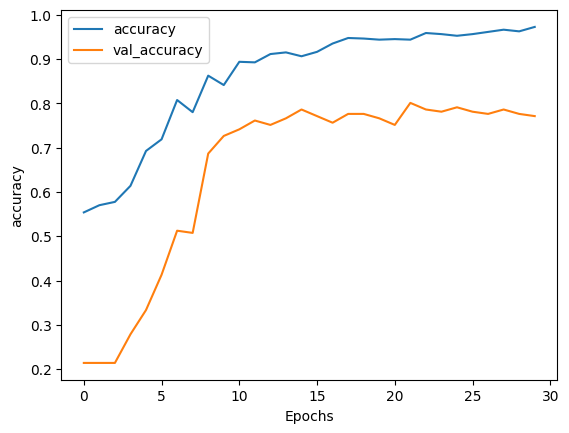

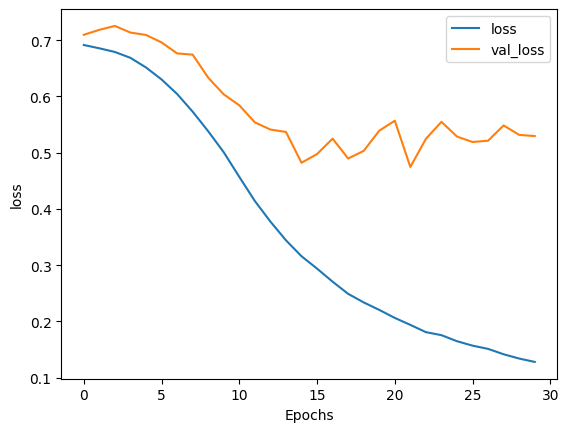

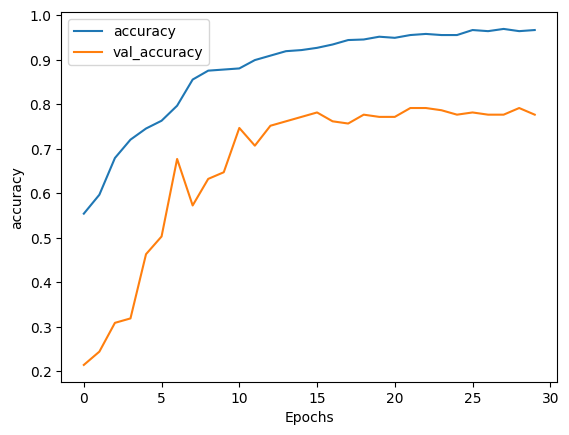

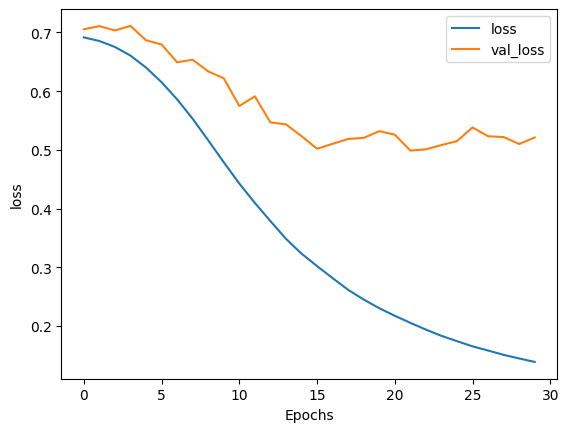

In [177]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [178]:

# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(2500, 16)
(2500, 16)


In [179]:

import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [180]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [181]:
# Use the model to predict a review
fake_reviews = ['putangina anong na recieve ko?',
                'maganda pwede na',
                "okaylang",
                "wow sobrang ganda",
                "sir okay armygreen shorts nice",
                "ano to?","pang gago yung product", "sakto lang"]

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['putangina anong na recieve ko?', 'maganda pwede na', 'okaylang', 'wow sobrang ganda', 'sir okay armygreen shorts nice', 'ano to?', 'pang gago yung product', 'sakto lang']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
putangina anong na recieve ko?
[0.2723649]


maganda pwede na
[0.758562]


okaylang
[0.4589177]


wow sobrang ganda
[0.85338]


sir okay armygreen shorts nice
[0.95700955]


ano to?
[0.53952754]


pang gago yung product
[0.7370441]


sakto lang
[0.483547]


['putangina anong na recieve ko?', 'maganda pwede na', 'okaylang', 'wow sobrang ganda', 'sir okay armygreen shorts nice', 'ano to?', 'pang gago yung product', 'sakto lang']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
putangina anong na recieve ko?
[0.25896424]


maganda pwede na
[0.71629494]


okaylang
[0.41750872]


wow sobrang ganda
[0.83039665]


sir okay armygreen shorts nic